# 20.07.22 16일차

---

# Tensorflow를 이용한 AI 기초 2 

## - nodes 0

In [1]:
from tensorflow.keras import layers, models
import tensorflow.keras.backend as K
import numpy as np

In [2]:
# Tensor
x = layers.Input((1,), name='x')
y = layers.Input((1,), name='y')

# Layer
h = layers.Dense(1, name='h')
a = layers.Dense(1, name='a')
b = layers.Dense(1, name='b')

In [3]:
print('h._inbound_nodes\n', h._inbound_nodes)
print('h._outbound_nodes\n', h._outbound_nodes)

h._inbound_nodes
 []
h._outbound_nodes
 []


In [4]:
hx = h(x)

print('h._inbound_nodes\n', h._inbound_nodes)
print('h._inbound_nodes[0].input_tensors\n', h._inbound_nodes[0].input_tensors)
print('h._inbound_nodes[0].output_tensors\n', h._inbound_nodes[0].output_tensors)

h._inbound_nodes
h._inbound_nodes[0].input_tensors
 Tensor("x:0", shape=(None, 1), dtype=float32)
h._inbound_nodes[0].output_tensors
 Tensor("h/Identity:0", shape=(None, 1), dtype=float32)


In [5]:
ahx = a(hx)

print('h._outbound_nodes\n', h._outbound_nodes)
print('a._inbound_nodes\n', a._inbound_nodes)
print('h._outbound_nodes[0].input_tensors\n', h._outbound_nodes[0].input_tensors)
print('h._outbound_nodes[0].output_tensors\n', h._outbound_nodes[0].output_tensors)
print('a._inbound_nodes[0].input_tensors\n', a._inbound_nodes[0].input_tensors)
print('a._inbound_nodes[0].output_tensors\n', a._inbound_nodes[0].output_tensors)

h._outbound_nodes
a._inbound_nodes
h._outbound_nodes[0].input_tensors
 Tensor("h/Identity:0", shape=(None, 1), dtype=float32)
h._outbound_nodes[0].output_tensors
 Tensor("a/Identity:0", shape=(None, 1), dtype=float32)
a._inbound_nodes[0].input_tensors
 Tensor("h/Identity:0", shape=(None, 1), dtype=float32)
a._inbound_nodes[0].output_tensors
 Tensor("a/Identity:0", shape=(None, 1), dtype=float32)


In [6]:
bhx = b(hx)

print('h._outbound_nodes\n', h._outbound_nodes)   # h.outbound에 a,b 모두 연결
print('b._inbound_nodes\n', b._inbound_nodes)
print('h._outbound_nodes[0].input_tensors\n', h._outbound_nodes[0].input_tensors)
print('h._outbound_nodes[0].output_tensors\n', h._outbound_nodes[0].output_tensors)
print('b._inbound_nodes[0].input_tensors\n', b._inbound_nodes[0].input_tensors)
print('b._inbound_nodes[0].output_tensors\n', b._inbound_nodes[0].output_tensors)

h._outbound_nodes
 [<tensorflow.python.keras.engine.node.Node object at 0x7f81ab38dcd0>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a45190>]
b._inbound_nodes
h._outbound_nodes[0].input_tensors
 Tensor("h/Identity:0", shape=(None, 1), dtype=float32)
h._outbound_nodes[0].output_tensors
 Tensor("a/Identity:0", shape=(None, 1), dtype=float32)
b._inbound_nodes[0].input_tensors
 Tensor("h/Identity:0", shape=(None, 1), dtype=float32)
b._inbound_nodes[0].output_tensors
 Tensor("b/Identity:0", shape=(None, 1), dtype=float32)


In [7]:
hy = h(y)

print('h._inbound_nodes\n', h._inbound_nodes)   # h.inbound에 x,y 모두 연결

h._inbound_nodes
 [<tensorflow.python.keras.engine.node.Node object at 0x7f81b1a2a7d0>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a5c750>]


In [8]:
ahy = a(hy)

print('h._outbound_nodes\n', h._outbound_nodes)
print('a._inbound_nodes\n', a._inbound_nodes)

h._outbound_nodes
 [<tensorflow.python.keras.engine.node.Node object at 0x7f81ab38dcd0>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a45190>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a5c850>]
a._inbound_nodes
 [<tensorflow.python.keras.engine.node.Node object at 0x7f81ab38dcd0>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a5c850>]


In [9]:
bhy = b(hy)

print('h._outbound_nodes\n', h._outbound_nodes)
print('b._inbound_nodes\n', b._inbound_nodes)

h._outbound_nodes
 [<tensorflow.python.keras.engine.node.Node object at 0x7f81ab38dcd0>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a45190>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a5c850>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a55450>]
b._inbound_nodes
 [<tensorflow.python.keras.engine.node.Node object at 0x7f81b1a45190>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a55450>]


In [10]:
model = models.Model([x,y], [ahx, bhx, ahy, bhy])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
y (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
h (Dense)                       (None, 1)            2           x[0][0]                          
                                                                 y[0][0]                          
__________________________________________________________________________________________________
a (Dense)                       (None, 1)            2           h[0][0]                      

Connect to의 h[0][0]은 h의 0번째 inbound node의 0번째 output tensor를 의미한다.

<img src="./nodes0.jpeg" width="50%">

---

## - nodes 1

In [11]:
x = layers.Input((1,), name='x')
y = layers.Input((1,), name='y')

h = layers.Lambda(lambda x:[x+1, x-1], name='h')
a = layers.Dense(1, name='a')
b = layers.Dense(1, name='b')

In [12]:
print('h._inbound_nodes\n', h._inbound_nodes)
print('h._outbound_nodes\n', h._outbound_nodes)

h._inbound_nodes
 []
h._outbound_nodes
 []


In [13]:
h0x, h1x = h(x)
h0y, h1y = h(y)

print('h_inbound_nodes\n', h._inbound_nodes)
print('h._inbound_nodes[0].input_tensors\n', h._inbound_nodes[0].input_tensors)
print('h._inbound_nodes[0].output_tensors\n', h._inbound_nodes[0].output_tensors)
print('h._inbound_nodes[1].input_tensors\n', h._inbound_nodes[1].input_tensors)
print('h._inbound_nodes[1].output_tensors\n', h._inbound_nodes[1].output_tensors)

h_inbound_nodes
 [<tensorflow.python.keras.engine.node.Node object at 0x7f81b05d4b10>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a93810>]
h._inbound_nodes[0].input_tensors
 Tensor("x_1:0", shape=(None, 1), dtype=float32)
h._inbound_nodes[0].output_tensors
 [<tf.Tensor 'h_2/Identity:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'h_2/Identity_1:0' shape=(None, 1) dtype=float32>]
h._inbound_nodes[1].input_tensors
 Tensor("y_1:0", shape=(None, 1), dtype=float32)
h._inbound_nodes[1].output_tensors
 [<tf.Tensor 'h_3/Identity:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'h_3/Identity_1:0' shape=(None, 1) dtype=float32>]


In [14]:
ah0x = a(h0x)
bh1x = b(h1x)
ah0y = a(h0y)
bh1y = b(h1y)

print('h_outbound_nodes\n', h._outbound_nodes)
print('h._outbound_nodes[0].input_tensors\n', h._outbound_nodes[0].input_tensors)
print('h._outbound_nodes[0].output_tensors\n', h._outbound_nodes[0].output_tensors)
print('h._outbound_nodes[1].input_tensors\n', h._outbound_nodes[1].input_tensors)
print('h._outbound_nodes[1].output_tensors\n', h._outbound_nodes[1].output_tensors)
print('h._outbound_nodes[2].input_tensors\n', h._outbound_nodes[2].input_tensors)
print('h._outbound_nodes[2].output_tensors\n', h._outbound_nodes[2].output_tensors)
print('h._outbound_nodes[3].input_tensors\n', h._outbound_nodes[3].input_tensors)
print('h._outbound_nodes[3].output_tensors\n', h._outbound_nodes[3].output_tensors)

h_outbound_nodes
 [<tensorflow.python.keras.engine.node.Node object at 0x7f81b1a66f50>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a66790>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1aab590>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1aa49d0>]
h._outbound_nodes[0].input_tensors
 Tensor("h_2/Identity:0", shape=(None, 1), dtype=float32)
h._outbound_nodes[0].output_tensors
 Tensor("a_2/Identity:0", shape=(None, 1), dtype=float32)
h._outbound_nodes[1].input_tensors
 Tensor("h_2/Identity_1:0", shape=(None, 1), dtype=float32)
h._outbound_nodes[1].output_tensors
 Tensor("b_2/Identity:0", shape=(None, 1), dtype=float32)
h._outbound_nodes[2].input_tensors
 Tensor("h_3/Identity:0", shape=(None, 1), dtype=float32)
h._outbound_nodes[2].output_tensors
 Tensor("a_3/Identity:0", shape=(None, 1), dtype=float32)
h._outbound_nodes[3].input_tensors
 Tensor("h_3/Identity_1:0", shape=(None, 1), dtype=float32)
h._outbound_nodes[3].output_tensors
 Tensor("b_

In [15]:
model = models.Model([x,y], [ah0x, bh1x, ah0y, bh1y])
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
y (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
h (Lambda)                      [(None, 1), (None, 1 0           x[0][0]                          
                                                                 y[0][0]                          
__________________________________________________________________________________________________
a (Dense)                       (None, 1)            2           h[0][0]                    

<img src="./nodes1.jpeg" width="50%">

---

## - nodes 2

In [16]:
x = layers.Input((1,), name='x')
y = layers.Input((1,), name='y')

h = layers.Add(name='h')
a = layers.Dense(1, name='a')
b = layers.Dense(1, name='b')

In [17]:
print('h._inbound_nodes\n', h._inbound_nodes)
print('h._outbound_nodes\n', h._outbound_nodes)

h._inbound_nodes
 []
h._outbound_nodes
 []


In [18]:
hxy = h([x,y])

print('h._inbound_nodes\n', h._inbound_nodes)
print('h._inbound_nodes[0].input_tensors\n', h._inbound_nodes[0].input_tensors)
print('h._inbound_nodes[0].output_tensors\n', h._inbound_nodes[0].output_tensors)

h._inbound_nodes
h._inbound_nodes[0].input_tensors
 [<tf.Tensor 'x_2:0' shape=(None, 1) dtype=float32>, <tf.Tensor 'y_2:0' shape=(None, 1) dtype=float32>]
h._inbound_nodes[0].output_tensors
 Tensor("h_4/Identity:0", shape=(None, 1), dtype=float32)


In [19]:
ahxy = a(hxy)
bhxy = b(hxy)

print('h._outbound_nodes\n', h._outbound_nodes)
print('a._inbound_nodes\n', a._inbound_nodes)
print('b._inbound_nodes\n', b._inbound_nodes)

h._outbound_nodes
 [<tensorflow.python.keras.engine.node.Node object at 0x7f81b1a6d0d0>, <tensorflow.python.keras.engine.node.Node object at 0x7f81b1a6d250>]
a._inbound_nodes
b._inbound_nodes


In [20]:
model = models.Model([x,y], [ahxy, bhxy])
model.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
x (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
y (InputLayer)                  [(None, 1)]          0                                            
__________________________________________________________________________________________________
h (Add)                         (None, 1)            0           x[0][0]                          
                                                                 y[0][0]                          
__________________________________________________________________________________________________
a (Dense)                       (None, 1)            2           h[0][0]                    

<img src="./nodes2.jpeg" width="50%">

---

## - Multi-input multi-output 0

여러개의 텐서를 입력받아 여러개의 텐서를 출력하는 모델을 알아봅시다. 그 예로서<br>
yA = a * (xA * xB) +b<br>
yB = c * (xA + xB) +d<br>
의 관계를 가지는 데이터에서 a,b,c,d를 학습으로 발견해봅시다.<br>

In [21]:
!pip install matplotlib

In [22]:
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
a = 2
b = 1
c = 2
d = 1

In [24]:
# -1 ~ 1 까지 랜덤하게 학습 데이터 생성
x_train_A = np.random.rand(1000,1) * 2 -1
x_train_B = np.random.rand(1000,1) * 2 -1

y_train_A = a * (x_train_A * x_train_B) + b
y_train_B = c * (x_train_A + x_train_B) + d

In [25]:
xA = layers.Input((1,), name='xA')
xB = layers.Input((1,), name='xB')
a = layers.Dense(1, name='xA')
b = layers.Dense(1, name='xB')
hA = layers.Multiply(name='mul')([xA, xB])
hB = layers.Add(name='add')([xA, xB])
yA = layers.Dense(1, name='yA')(hA)
yB = layers.Dense(1, name='yB')(hB)

In [26]:
model = models.Model([xA, xB], [yA, yB])
model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
xA (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
xB (InputLayer)                 [(None, 1)]          0                                            
__________________________________________________________________________________________________
mul (Multiply)                  (None, 1)            0           xA[0][0]                         
                                                                 xB[0][0]                         
__________________________________________________________________________________________________
add (Add)                       (None, 1)            0           xA[0][0]                   

In [27]:
model.compile(optimizer='adam', loss='mse') # 학습을 위해서 실행
# model.compile(optimizer='adam', loss={'yA': 'mse', 'yB': 'mse'}, loss_weights={'yA':2., 'yB':1.}) # 각각 loss를 다르게 해줄 경우

In [28]:
hist = model.fit([x_train_A, x_train_B], [y_train_A, y_train_B], batch_size=8, epochs=200, validation_split=0.2)

Epoch 1/200
100/100 [==============================] - 1s 11ms/step - loss: 3.6427 - yA_loss: 1.7483 - yB_loss: 1.8944 - val_loss: 3.2164 - val_yA_loss: 1.4653 - val_yB_loss: 1.7511
Epoch 2/200
100/100 [==============================] - 1s 8ms/step - loss: 3.1212 - yA_loss: 1.5237 - yB_loss: 1.5975 - val_loss: 2.7441 - val_yA_loss: 1.2723 - val_yB_loss: 1.4719
Epoch 3/200
100/100 [==============================] - 1s 8ms/step - loss: 2.6664 - yA_loss: 1.3276 - yB_loss: 1.3388 - val_loss: 2.3343 - val_yA_loss: 1.1072 - val_yB_loss: 1.2271
Epoch 4/200
100/100 [==============================] - 0s 5ms/step - loss: 2.2722 - yA_loss: 1.1575 - yB_loss: 1.1147 - val_loss: 1.9785 - val_yA_loss: 0.9634 - val_yB_loss: 1.0150
Epoch 5/200
100/100 [==============================] - 0s 4ms/step - loss: 1.9309 - yA_loss: 1.0101 - yB_loss: 0.9207 - val_loss: 1.6734 - val_yA_loss: 0.8386 - val_yB_loss: 0.8348
Epoch 6/200
100/100 [==============================] - 0s 2ms/step - loss: 1.6365 - yA_loss: 0

Epoch 45/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0044 - yA_loss: 0.0044 - yB_loss: 6.7920e-11 - val_loss: 0.0037 - val_yA_loss: 0.0037 - val_yB_loss: 4.1539e-11
Epoch 46/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0035 - yA_loss: 0.0035 - yB_loss: 4.0436e-11 - val_loss: 0.0028 - val_yA_loss: 0.0028 - val_yB_loss: 2.7297e-11
Epoch 47/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0027 - yA_loss: 0.0027 - yB_loss: 2.9037e-11 - val_loss: 0.0022 - val_yA_loss: 0.0022 - val_yB_loss: 2.7297e-11
Epoch 48/200
100/100 [==============================] - 0s 1ms/step - loss: 0.0020 - yA_loss: 0.0020 - yB_loss: 2.9037e-11 - val_loss: 0.0017 - val_yA_loss: 0.0017 - val_yB_loss: 2.7297e-11
Epoch 49/200
100/100 [==============================] - 0s 2ms/step - loss: 0.0015 - yA_loss: 0.0015 - yB_loss: 2.6508e-11 - val_loss: 0.0012 - val_yA_loss: 0.0012 - val_yB_loss: 2.2544e-11
Epoch 50/200
100/100 [============================

Epoch 125/200
100/100 [==============================] - 0s 1ms/step - loss: 3.2634e-14 - yA_loss: 2.7176e-14 - yB_loss: 5.4589e-15 - val_loss: 2.8618e-14 - val_yA_loss: 2.4155e-14 - val_yB_loss: 4.4627e-15
Epoch 126/200
100/100 [==============================] - 0s 1ms/step - loss: 3.2634e-14 - yA_loss: 2.7176e-14 - yB_loss: 5.4589e-15 - val_loss: 2.8618e-14 - val_yA_loss: 2.4155e-14 - val_yB_loss: 4.4627e-15
Epoch 127/200
100/100 [==============================] - 0s 2ms/step - loss: 3.2634e-14 - yA_loss: 2.7176e-14 - yB_loss: 5.4589e-15 - val_loss: 2.8618e-14 - val_yA_loss: 2.4155e-14 - val_yB_loss: 4.4627e-15
Epoch 128/200
100/100 [==============================] - 0s 1ms/step - loss: 3.2634e-14 - yA_loss: 2.7176e-14 - yB_loss: 5.4589e-15 - val_loss: 2.8618e-14 - val_yA_loss: 2.4155e-14 - val_yB_loss: 4.4627e-15
Epoch 129/200
100/100 [==============================] - 0s 2ms/step - loss: 3.2634e-14 - yA_loss: 2.7176e-14 - yB_loss: 5.4589e-15 - val_loss: 2.8618e-14 - val_yA_loss: 2.

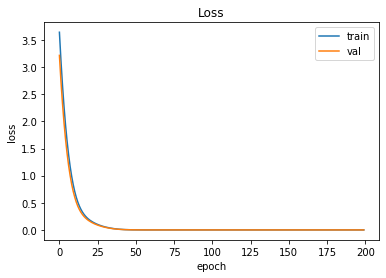

yA_weights
 [array([[2.000002]], dtype=float32), array([1.0000006], dtype=float32)]
yB_weights
 [array([[2.0000014]], dtype=float32), array([1.0000007], dtype=float32)]


In [29]:
plt.title('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc=0)
plt.show()

print('yA_weights\n', model.get_layer('yA').get_weights())
print('yB_weights\n', model.get_layer('yB').get_weights())

<img src='Multi-input multi-output 0.jpeg' width="50%">